In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import clear_output
import glob, time
import os

## Step 1

### Decide what video you are going to use for this homework, select an object and generate the template. You can use any video you want (your own, from Youtube, etc.) and track any object you want (e.g. a car, a pedestrian, etc.).

In [2]:
video_path = "video.mp4"
cap = cv2.VideoCapture(video_path)
success, frame = cap.read()

if not success:
    print("Failed to read video, please retry")

In [3]:
# Select region of interest (ROI)
bbox = cv2.selectROI("Select Object", frame, False)
cv2.destroyWindow("Select Object")
print("Selected bounding box:", bbox)

2025-11-01 19:35:55.870 python3.12[70252:13455728] +[IMKClient subclass]: chose IMKClient_Modern
2025-11-01 19:35:55.870 python3.12[70252:13455728] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Selected bounding box: (736, 473, 63, 127)


## Step 2

### Initialize a tracker (e.g. KCF).

In [5]:
def create_tracker(tracker_name="KCF"):
    tracker_name = tracker_name.upper()

    if tracker_name == "KCF":
        try:
            return cv2.legacy.TrackerKCF_create()
        except:
            return cv2.TrackerKCF_create()

    if tracker_name == "CSRT":
        try:
            return cv2.legacy.TrackerCSRT_create()
        except:
            return cv2.TrackerCSRT_create()

    raise ValueError("Unknown tracker type")

## Step 3

### Run the tracker on the video and the selected object. Run the tracker for around 10-15 frames.

In [13]:
def run_tracker(tracker_name, bbox, num_frames=15):
    # Make sure the results folder exists
    os.makedirs("results", exist_ok=True)

    cap = cv2.VideoCapture(video_path)
    success, frame = cap.read()

    if not success:
        print("Failed to read video, please retry")
        return
    
    # Create tracker
    if tracker_name.upper() == "KCF":
        tracker = create_tracker()
    elif tracker_name.upper() == "CSRT":
        tracker = create_tracker(tracker_name="CSRT")
    else:
        raise ValueError("Unsupported tracker")
    
    tracker.init(frame, bbox)
    
    print(f"Running {tracker_name} tracker...")

    i = 0
    while i < num_frames:
        ret, frame = cap.read()
        if not ret:
            print("End of video or read error")
            break

        success, box = tracker.update(frame)

        if success:
            (x, y, w, h) = [int(v) for v in box]
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
        else:
            cv2.putText(frame, "Tracking Failure", (20,50),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        # Save frame to folder
        save_path = f"results/{tracker_name}_frame_{i}.jpg"
        cv2.imwrite(save_path, frame)

        i += 1

    cap.release()
    print(f"Saved {i} frames for {tracker_name} in /results/")

In [14]:
run_tracker("KCF", bbox)

Running KCF tracker...
Saved 15 frames for KCF in /results/


## Step 4

### For each frame, print the bounding box on the image and save it.

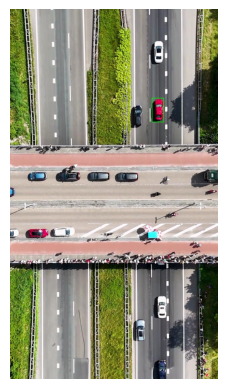

In [32]:
frames_kcf = sorted(glob.glob("results/KCF_frame_*.jpg"))

for f in frames_kcf:
    img = mpimg.imread(f)
    clear_output(wait=True)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    time.sleep(0.1)

## Step 5 

### Select a different tracker (e.g. CSRT) and repeat steps 2, 3 and 4.

In [15]:
run_tracker("CSRT", bbox)

Running CSRT tracker...
Saved 15 frames for CSRT in /results/


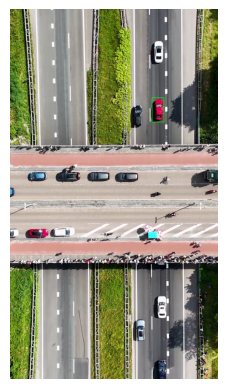

In [31]:
frames_csrt = sorted(glob.glob("results/CSRT_frame_*.jpg"))

for f in frames_csrt:
    img = mpimg.imread(f)
    clear_output(wait=True)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    time.sleep(0.1)